In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import statsmodels

from sklearn.linear_model import LinearRegression
import sklearn

In [17]:
#read a file
df = pd.read_csv("full_data_221206.csv", encoding="latin")
df.head(3)

,Unnamed: 0,ward,borough,%_english_is_first_language_of_no_one_in_household_2011,median_house_price_2014,median_household_income_estimate_2012_13,male_life_expectancy_2009_13,female_life_expectancy_2009_13,%_area_that_is_open_space_2014,%_travel_by_bicycle_to_work_2011,turnout_at_mayoral_election_2012,crime_rate_2014_15,%_bame_2011,%_all_older_people_aged_65_2015,%_homes_with_good_access_to_nature,%_homes_with_deficiency_in_access_to_nature,female_life_expectancy_normalised,male_life_expectancy_normalised,median_household_income_estimate_2012_13_log
0,1,E05000026,Barking and Dagenham,25.7,173000.0,33920.0,80.2,83.9,21.9,0.8,25.7,138.1,71.9,5.0,98.0,2.0,0.996498,1.005313,10.431760
1,2,E05000027,Barking and Dagenham,7.9,215000.0,32470.0,77.2,80.6,20.6,1.0,20.3,73.6,29.9,10.0,28.0,72.0,0.957303,0.967708,10.388072
2,3,E05000028,Barking and Dagenham,10.5,210000.0,33000.0,79.0,79.3,1.9,1.6,22.5,79.9,41.2,8.7,83.0,17.0,0.941863,0.990271,10.404263


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 19 columns):
 #   Column                                                   Non-Null Count  Dtype  
---  ------                                                   --------------  -----  
 0   Unnamed: 0                                               624 non-null    int64  
 1   ward                                                     624 non-null    object 
 2   borough                                                  624 non-null    object 
 3   %_english_is_first_language_of_no_one_in_household_2011  624 non-null    float64
 4   median_house_price_2014                                  624 non-null    float64
 5   median_household_income_estimate_2012_13                 624 non-null    float64
 6   male_life_expectancy_2009_13                             624 non-null    float64
 7   female_life_expectancy_2009_13                           624 non-null    float64
 8   %_area_that_is_open_space_2014

In [19]:
df.rename(columns = {'turnout_at_mayoral_election_2012' : 'turnout'}, inplace=True)
df.rename(columns = {'median_household_income_estimate_2012_13' : 'income'}, inplace=True)

In [20]:
# create a fitted model in one line
lm = smf.ols(formula='turnout ~ income', data=df).fit()

# print the coefficients
lm.params

Intercept    19.691103
income        0.000368
dtype: float64

In [21]:
# summary 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                turnout   R-squared:                       0.260
Model:                            OLS   Adj. R-squared:                  0.259
Method:                 Least Squares   F-statistic:                     219.0
Date:                Tue, 06 Dec 2022   Prob (F-statistic):           1.12e-42
Time:                        14:28:07   Log-Likelihood:                -1835.7
No. Observations:                 624   AIC:                             3675.
Df Residuals:                     622   BIC:                             3684.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     19.6911      0.993     19.827      0.0

In [10]:
# the Model for Prediction (𝑦 = 𝛽0 + 𝛽1𝑥)
# 𝑦 = 19.691103 + 0.000368 × 𝑥

In [22]:
# you have to create a DataFrame since the Statsmodels formula interface expects it
# let's use the value of median income
X_new = pd.DataFrame({'income': [38165.0]}) 
X_new

,income
0,38165.0


In [23]:
# make predictions for those x values and store them
preds = lm.predict(X_new)
preds

0    33.744109
dtype: float64

In [24]:
#estimated value (The voting rate corresponding to income)
lm.fittedvalues 

0      32.181027
1      31.647112
2      31.842267
3      32.181027
4      33.462423
         ...    
619    37.122501
620    36.831609
621    38.194012
622    31.617655
623    39.931997
Length: 624, dtype: float64

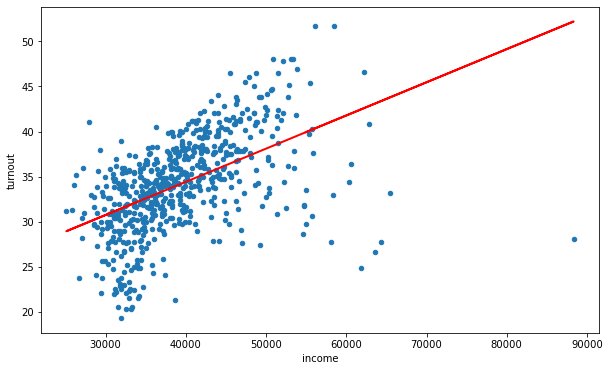

In [25]:
#scatter plot
fig, axs = plt.subplots(figsize = (10, 6))
df.plot(kind='scatter', x='income', y='turnout', ax=axs, figsize=(10, 6))
# plt.plot(X_new, preds, c='red', linewidth=2) #it doesn't work!
plt.plot(df['income'],lm.fittedvalues,color='red', linewidth = 2)

In [ ]:
#Residual analysis

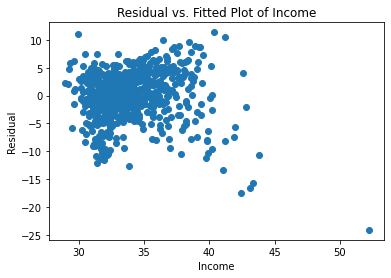

In [26]:
# plot #잔차 분석 시 
plt.scatter(lm.fittedvalues, lm.resid)
# adding title and labels
plt.xlabel('Income')
plt.ylabel('Residual')
plt.title('Residual vs. Fitted Plot of Income')
plt.show()

In [27]:
# The Durbin-Watson test statistic is to test the correlation of the residuals - are they independent?
# The null hypothesis of the test is that there is no serial correlation in the residuals
# The test statistic is approximately equal to 2*(1-r) where r is the sample autocorrelation of the residuals. 
# Thus, for r == 0, indicating no serial correlation, the test statistic equals 2. This statistic will always be between 0 and 4. 
# The closer to 0 the statistic, the more evidence for positive serial correlation. The closer to 4, the more evidence for negative serial correlation.

statsmodels.stats.stattools.durbin_watson(lm.resid)

1.2255457579679145

In [28]:
# The Jarque-Bera test statistic (JB) tests the null that the data is normally distributed against an alternative that the data follow some other distribution. 
# The test statistic is based on two moments of the data, the skewness, and the kurtosis, and has an asymptotic chi-squared distribution.
# The test statistic of the JB test is always a positive number. If it's far from zero, it indicates that the sample data do not have a normal distribution.

statsmodels.stats.stattools.jarque_bera(lm.resid)

(128.7029810476554,
 1.1285031177452477e-28,
 -0.8066132048138192,
 4.532192940513359)

In [ ]:
# 2 variables: correlation
# linear regression (y: turnout, x: income) and check the LINE assumptions 

# Assumptions : There is no relationship between median household income(2012_13) and turnout at mayoral election(2012)
# Results
# - There is a correlation between income and turnout.
# - The accurancy of this model is about 26%.

In [ ]:
# using Linear Regression in sklearn

In [18]:
x = df['income'].values.reshape(-1,1) 
y = df['turnout']
 
fit = LinearRegression().fit(x,y) 

In [19]:
# print the coefficients #same results as above
print(fit.intercept_) #intercept
print(fit.coef_) #slope

19.691103152006328
[0.00036822]


In [20]:
#estimated value (The voting rate corresponding to income)
fit.predict(x)

array([32.18102709, 31.6471123 , 31.84226736, 32.18102709, 33.46242259,
       31.79439914, 30.54614318, 31.93432164, 31.23102698, 34.62967079,
       31.30098823, 31.42249987, 32.02269374, 31.68761618, 31.91591078,
       31.45932158, 33.38141483, 34.34614362, 30.51668581, 34.03684126,
       30.80021298, 33.71649239, 34.37191882, 34.84691887, 33.83432186,
       36.27191904, 39.23974884, 34.71436072, 33.90060093, 33.87850791,
       35.8705624 , 35.12676387, 35.03470959, 36.68432219, 33.32986443,
       35.17463209, 32.61184109, 33.76436061, 33.75699627, 32.03005808,
       34.70699638, 34.54498085, 34.71067855, 34.48974829, 32.37618215,
       32.54187985, 32.77385662, 33.89691876, 33.0426551 , 31.9011821 ,
       34.05156994, 32.81067833, 34.74381809, 30.71184087, 33.36300397,
       35.8963376 , 33.87114357, 34.8690119 , 31.51087197, 31.19788744,
       32.44246123, 34.42715138, 31.102151  , 32.0153294 , 32.79594964,
       29.64401129, 32.4461434 , 35.22618248, 32.30990307, 33.25

In [21]:
fit.predict([[38165.0]])

array([33.74410867])